In [1]:
%matplotlib inline
import tensorflow.keras.backend as K
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,confusion_matrix,accuracy_score
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA
from tensorflow.keras.applications import VGG16, ResNet50,VGG19,ResNet50V2,EfficientNetB0
from sklearn.preprocessing import StandardScaler
from Visualize import *
from Preprocess import *
# from DimensionalityReduction import *
from Visualize import *
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from pathlib import *
import pandas as pd
import numpy as np
import librosa
import glob
import shutil
import os
import cv2

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

In [3]:
figures = "./Figures/"

In [4]:
INPUT_PATH = Path('/net/store/cbc/projects/Pan troglodytes/audio_PH_dataset/PH/good_data/')
file_path =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/clip_loango.npz'
file_path2 =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/clip_loango_resized.npz'
BASE_PATH =  '/net/store/cv/users/ybrima/scratch/data/Luango_Speaker/'
FRAME_LENGHT =  1024
SAMPLE_RATE =  44100
HOP_LENGTH =  512

In [5]:
CLASSES =  get_classes(INPUT_PATH)

In [6]:
CLASSES

['PAN', 'THE', 'GUM', 'ARN', 'CHE', 'FRE', 'LIT', 'LOU', 'NGO', 'CHI']

In [7]:
df = get_files(INPUT_PATH,BASE_PATH)

84 files read successfully


In [8]:
df.head()

,file,class,label,duration
0,/net/store/cbc/projects/Pan troglodytes/audio_...,0,PAN,40.105215
1,/net/store/cbc/projects/Pan troglodytes/audio_...,0,PAN,9.431655
2,/net/store/cbc/projects/Pan troglodytes/audio_...,0,PAN,21.143220
3,/net/store/cbc/projects/Pan troglodytes/audio_...,0,PAN,17.011519
4,/net/store/cbc/projects/Pan troglodytes/audio_...,0,PAN,22.009615


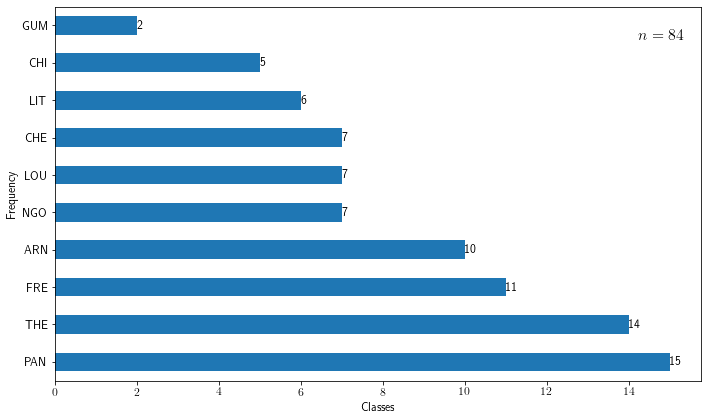

In [9]:
plt.figure(1,figsize=(10,6))
ax = df['label'].value_counts().plot.barh(rot=0)
plt.annotate(fr"$n = {df.shape[0]}$",(14.2,8.6),weight='bold',fontsize=16)
ax.bar_label(ax.containers[0])
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(f'{figures}/Data_Distribution.png', bbox_inches ="tight", dpi=300)
plt.show()

In [10]:
# We are creating the dataset without resizing both temporal and spectral dimensions
X,y,Z = build_dataset(INPUT_PATH)

1761  1 second audio samples created successfully


In [11]:
# We are creating the dataset by resizing both temporal and spectral dimensions using the crops_dims parameter
# X,y,Z = build_dataset(INPUT_PATH,dur=1, keepdims=False, crop_dims= (128,128))

In [12]:
# data =  np.load(file_path, allow_pickle=True)
# X = data['x']
# y = data['y']
# Z =  data['z']
# CLASSES = list(data['c'])

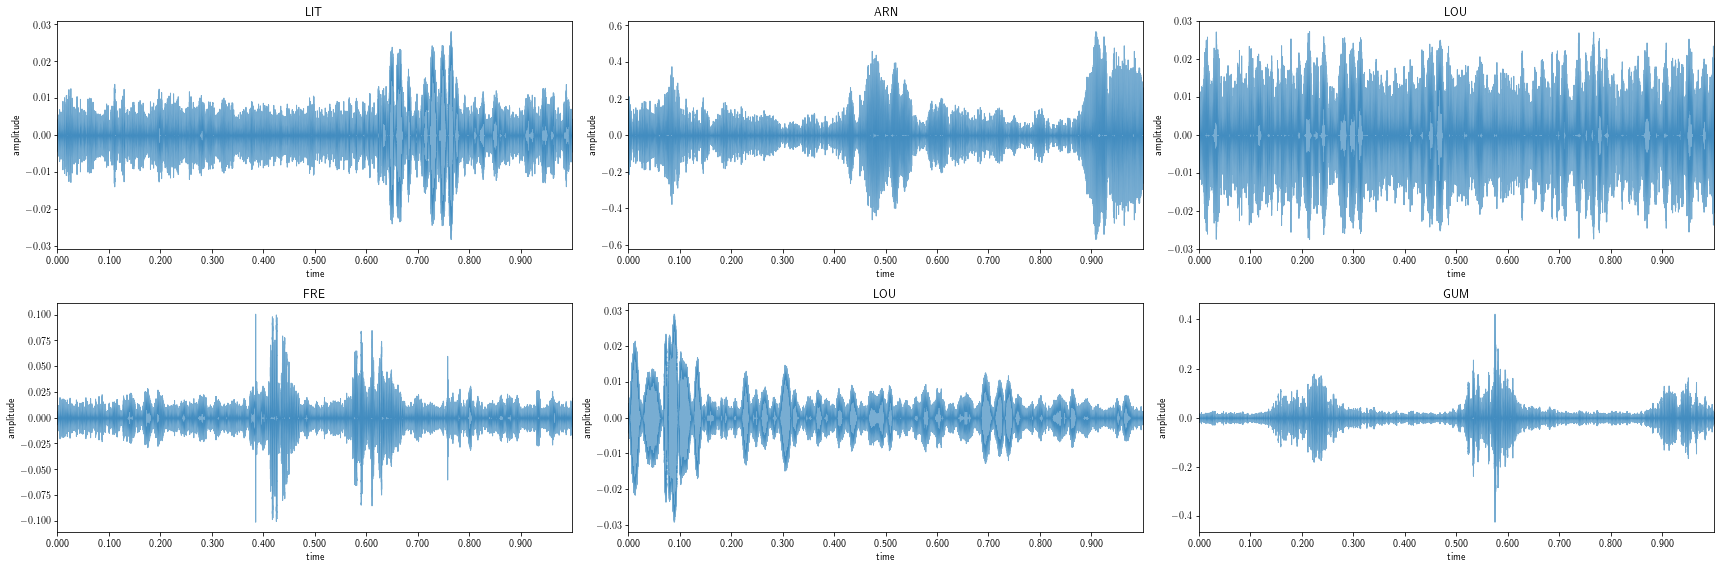

In [42]:
display(X,Z,y,CLASSES,filename='Sample_Waveplot.png')

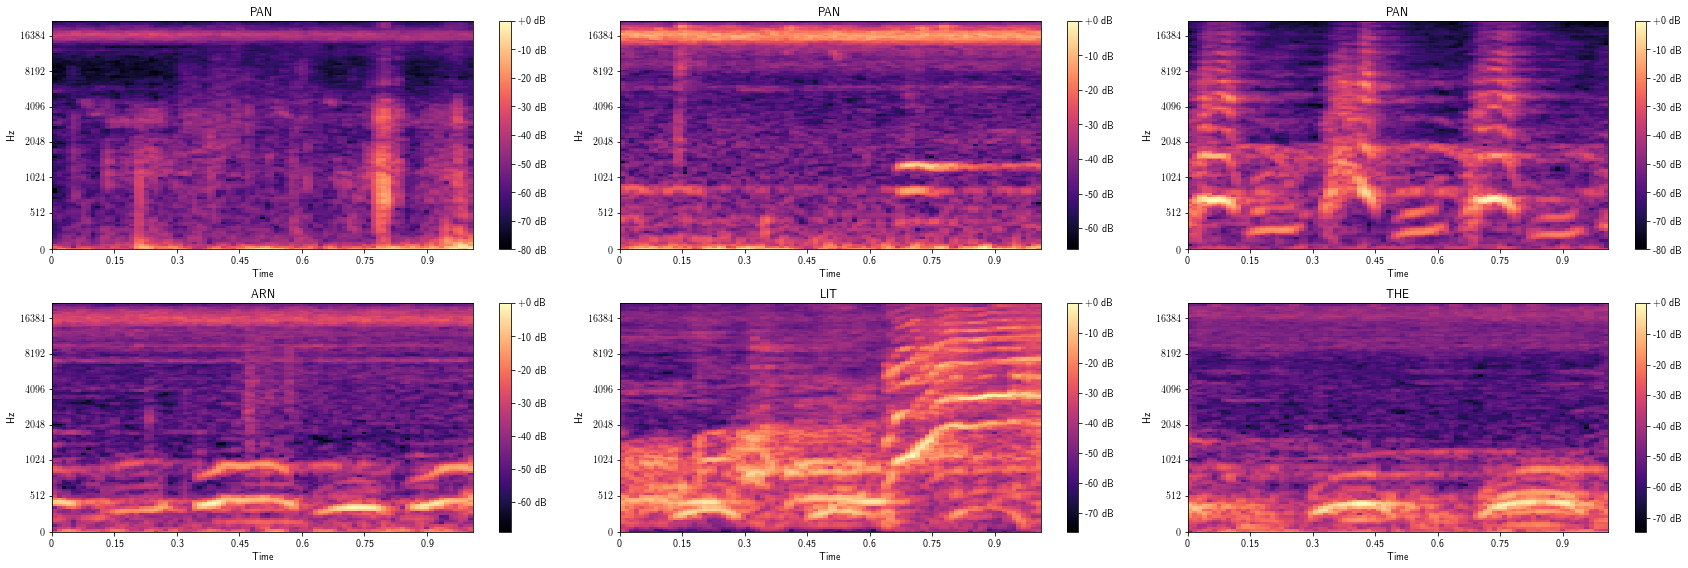

In [44]:
display(X,Z,y,CLASSES, flag=True,filename='UnNormalized_Frequency_MelSpectogram.png')

In [45]:
X =  (X - X.mean(axis=0, keepdims=True))/X.std(axis=0,keepdims=True)

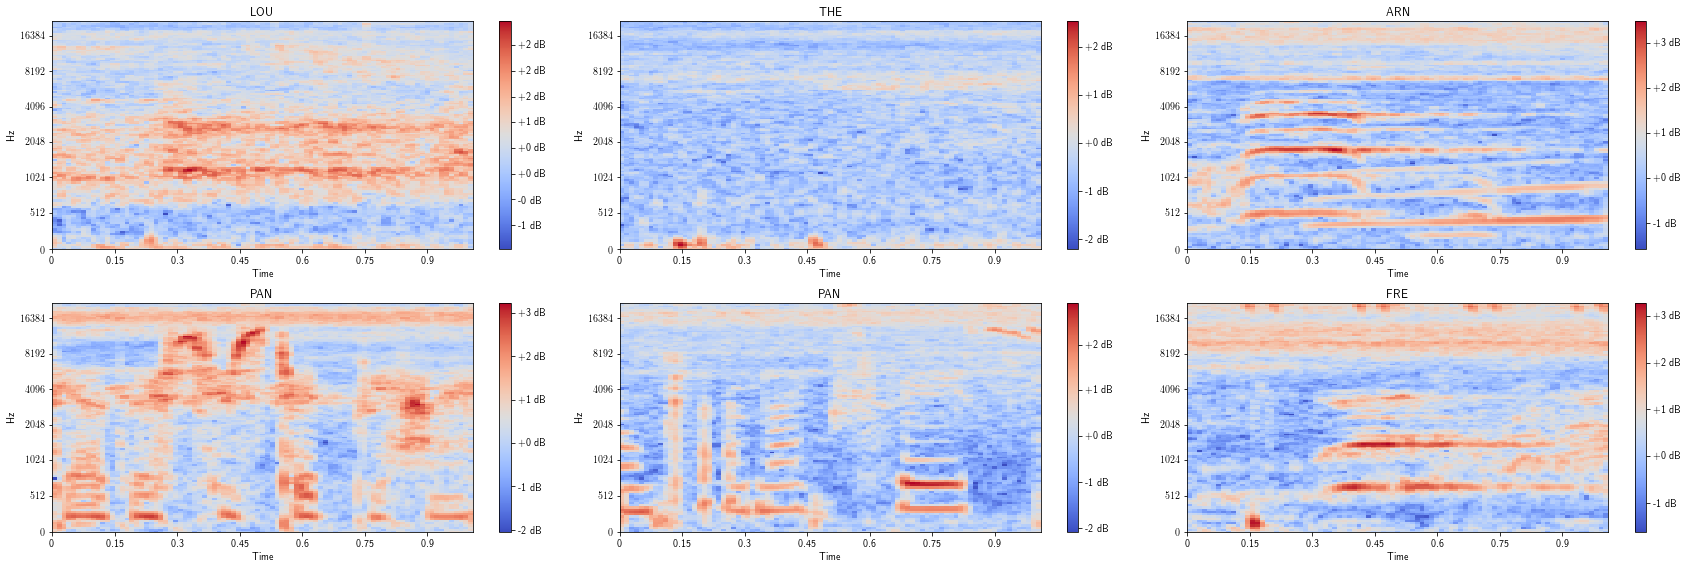

In [47]:
display(X,Z,y,CLASSES, flag=True, save=True, filename='Normalized_Frequency_MelSpectogram.png')

In [17]:
input_shape =  (X.shape[1],X.shape[2],1)
output =  len(CLASSES)
X = X[...,np.newaxis]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

In [19]:
pca = PCA(n_components=3)
X_pca =  pca.fit_transform(X.reshape(X.shape[0],-1))

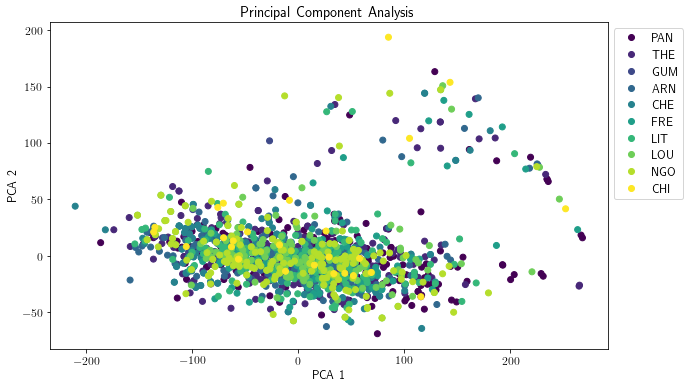

In [20]:
plot_components(X_pca,y,CLASSES,x_str='PCA 1', y_str='PCA 2', str_title="Principal Component Analysis", title="Normalized_PCA.png")

In [21]:
svd = TruncatedSVD(n_components=3)
X_svd =  svd.fit_transform(X.reshape(X.shape[0],-1))

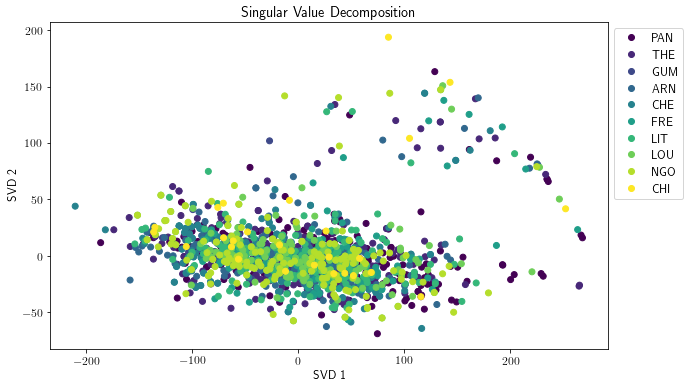

In [22]:
plot_components(X_svd,y,CLASSES,x_str='SVD 1', y_str='SVD 2', str_title="Singular Value Decomposition", title="Normalized_SVD.png")

In [23]:
ica =  FastICA(n_components=3, random_state=np.random.seed(42))
X_ica = ica.fit_transform(X.reshape(X.shape[0],-1))

/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


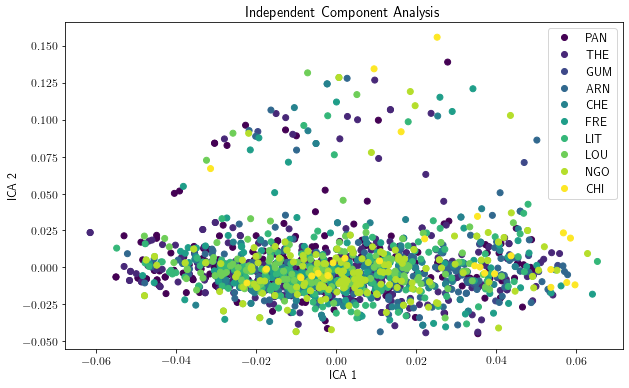

In [24]:
plot_components(X_ica,y,CLASSES,x_str='ICA 1', y_str='ICA 2', str_title="Independent Component Analysis", title="Normalized_ICA.png")

In [25]:
%matplotlib notebook
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


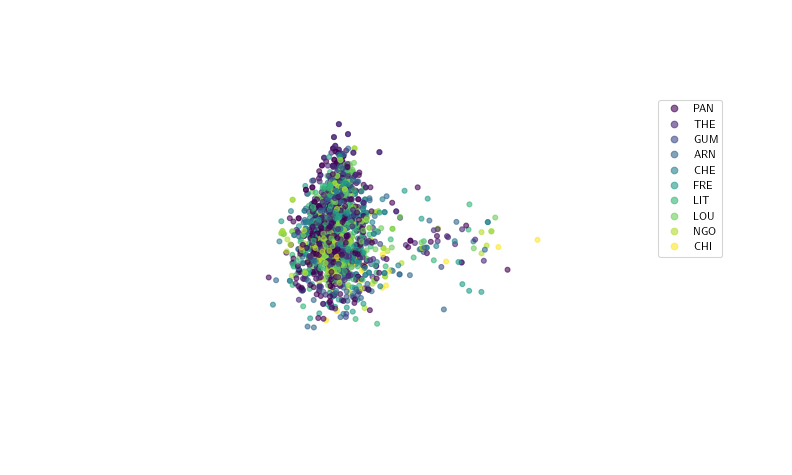

<ipython-input-26-207589e9c079>:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [26]:
# First import everthing you need

n = len(X_pca[:,0])
xx = X_pca[:,0]
yy = X_pca[:,1]
zz = X_pca[:,2]

# Create a figure and a 3D Axes
fig = plt.figure(3, figsize=(10,6))
fig.patch.set_facecolor(None)
fig.patch.set_alpha(0.0)
ax = Axes3D(fig)
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.axis('off')
# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    scatter = ax.scatter(xx, yy, zz, marker='o', s=20, c=list(y), alpha=0.6)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    ax.legend(handles=scatter.legend_elements()[0], labels=CLASSES,bbox_to_anchor=(1.2, 0.8))
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [27]:
# Save
anim.save('./Figures/animation_PCA.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})

<ipython-input-27-e3abc5dc1119>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  anim.save('./Figures/animation_PCA.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})
<ipython-input-27-e3abc5dc1119>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  anim.save('./Figures/animation_PCA.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


In [28]:
%cd Figures
!ffmpeg -i animation_PCA.mp4 -filter:v fps=fps=30 animation_PCA.gif
%cd ..

/net/store/cv/users/ybrima/RTGCompCog/Experiments/Figures
ffmpeg version 9c33b2f Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 

<IPython.core.display.Javascript object>


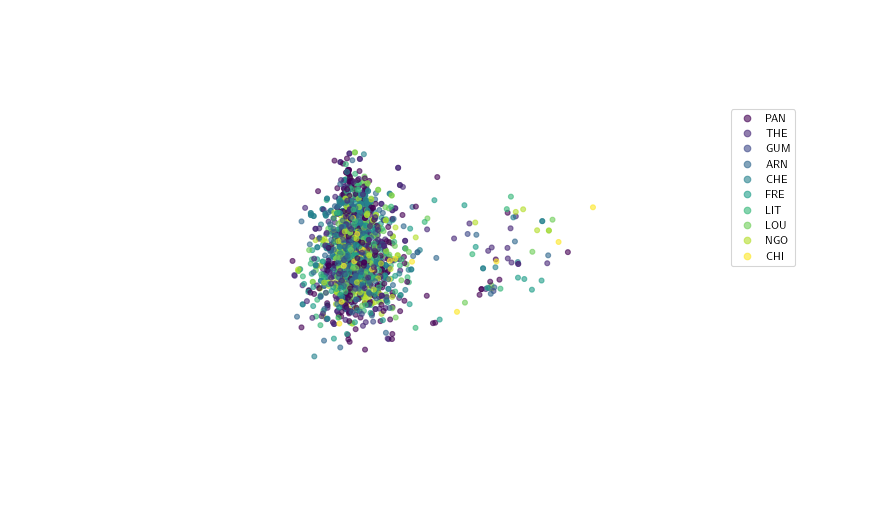

<ipython-input-29-ba7d0dc64faa>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [29]:
n = len(X_pca[:,0])
xx = X_ica[:,0]
yy = X_ica[:,1]
zz = X_ica[:,2]

# Create a figure and a 3D Axes
fig = plt.figure(4, figsize=(10,6))
fig.patch.set_facecolor(None)
fig.patch.set_alpha(0.0)
ax = Axes3D(fig)
ax.grid(False)
ax.axis('off')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    scatter = ax.scatter(xx, yy, zz, marker='o', s=20, c=list(y), alpha=0.6)
    ax.set_xlabel("ICA 1")
    ax.set_ylabel("ICA 2")
    ax.set_zlabel("ICA 3")
    ax.legend(handles=scatter.legend_elements()[0], labels=CLASSES,bbox_to_anchor=(1.2, 0.8))
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [30]:
# Save
anim.save('./Figures/animation_ICA.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})

<ipython-input-30-669bc4476d55>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  anim.save('./Figures/animation_ICA.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


In [31]:
%cd Figures
!ffmpeg -i animation_ICA.mp4 -filter:v fps=fps=30 animation_ICA.gif
%cd ..

/net/store/cv/users/ybrima/RTGCompCog/Experiments/Figures
ffmpeg version 9c33b2f Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 

<IPython.core.display.Javascript object>


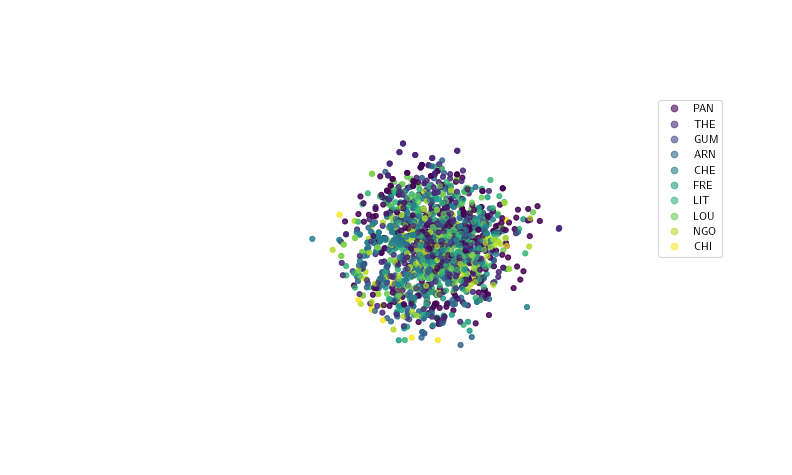

<ipython-input-32-334fb08a06c5>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [32]:
n = len(X_svd[:,0])
xx = X_svd[:,0]
yy = X_svd[:,1]
zz = X_svd[:,2]

# Create a figure and a 3D Axes
fig = plt.figure(5, figsize=(10,6))
fig.patch.set_facecolor(None)
fig.patch.set_alpha(0.0)
ax = Axes3D(fig)
ax.grid(False)
ax.axis('off')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    scatter = ax.scatter(xx, yy, zz, marker='o', s=20, c=list(y), alpha=0.6)
    ax.set_xlabel("SVD 1")
    ax.set_ylabel("SVD 2")
    ax.set_zlabel("SVD 3")
    ax.legend(handles=scatter.legend_elements()[0], labels=CLASSES,bbox_to_anchor=(1.2, 0.8))
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [33]:
# Save
anim.save('./Figures/animation_SVD.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})

<ipython-input-33-b011aff22e39>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  anim.save('./Figures/animation_SVD.mp4',dpi=300,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


In [34]:
%cd Figures
!ffmpeg -i animation_SVD.mp4 -filter:v fps=fps=30 animation_SVD.gif
%cd ..

/net/store/cv/users/ybrima/RTGCompCog/Experiments/Figures
ffmpeg version 9c33b2f Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.3.0 (crosstool-NG 1.24.0.133_b0863d8_dirty)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1627813612080/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 

In [14]:
# We are creating the dataset by resizing both temporal and spectral dimensions using the crops_dims parameter
X,y,Z = build_dataset(INPUT_PATH,dur=1, keepdims=False, crop_dims= (128,128),outpath=file_path2)

1761  1 second audio samples created successfully


In [15]:
X =  (X - X.mean(axis=0, keepdims=True))/X.std(axis=0,keepdims=True)

In [16]:
input_shape =  (X.shape[1],X.shape[2],1)
output =  len(CLASSES)
X = X[...,np.newaxis]
X.shape

(1761, 128, 128, 1)

In [79]:
128*128

16384

In [89]:
latent_dim = 64 
import tensorflow as tf
class Autoencoder(keras.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      keras.layers.Flatten(),
      keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      keras.layers.Dense(784, activation='sigmoid'),
      keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [90]:
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [91]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [92]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.0240 - accuracy: 0.1154 - val_loss: 0.0134 - val_accuracy: 0.1501
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0118 - accuracy: 0.1733 - val_loss: 0.0107 - val_accuracy: 0.1902
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0102 - accuracy: 0.1951 - val_loss: 0.0098 - val_accuracy: 0.2008
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0096 - accuracy: 0.2046 - val_loss: 0.0095 - val_accuracy: 0.2074
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0094 - accuracy: 0.2100 - val_loss: 0.0094 - val_accuracy: 0.2114
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - accuracy: 0.2133 - val_loss: 0.0092 - val_accuracy: 0.2129
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - accuracy: 0.2148 - val_loss: 0.0093 - val_accuracy:

In [95]:
# class ConvAutoEncoder(keras.Model):
#   def __init__(self):
#     super(ConvAutoEncoder, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       keras.layers.Input(shape=(28, 28, 1)), 
#       keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
#       keras.layers.Conv2D(4, (3,3), activation='relu', padding='same', strides=2)])
    
#     self.decoder = tf.keras.Sequential([
#       keras.layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
#       keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
#       keras.layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = ConvAutoEncoder()

In [ ]:
#https://ai.plainenglish.io/convolutional-autoencoders-cae-with-tensorflow-97e8d8859cbe

In [107]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint

encoder = models.Sequential()

encoder.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(128,128,1)))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

# encoder.summary()

In [106]:
decoder = models.Sequential()

decoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', input_shape=encoder.output.shape[1:]))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(1, 3, strides=1, padding='same', activation='relu'))
decoder.add(layers.UpSampling2D(2))

decoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 16, 16, 128)       147584    
                                                                 
 up_sampling2d_39 (UpSamplin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 32, 32, 16)        18448     
                                                                 
 up_sampling2d_40 (UpSamplin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_118 (Conv2D)         (None, 64, 64, 1)         145       
                                                                 
 up_sampling2d_41 (UpSamplin  (None, 128, 128, 1)    